# Rain Detection in Australia

# Learning Agenda of this Notebook:
1. The problem statement
2. Import libraries
3. Import dataset
4. Linear Regression vs Logistic Regression
    - Classification Problems
    - Regression Problems

5. Linear Regression for Solving Regression Problems

6. Logistic Regression for Solving Classification Problems

7. Machine Learning Work-Flow

8. Declare feature vector and target variable
9. Split data into training and test set
10. Feature Engineering
    - Engineering missing values in numerical variables
    - Engineering missing values in categorical variables
    - Engineering outliers in numerical variables
    - Encode categorical variables

11. Feature Scaling
12. Model training
13. Predict results
14. Check accuracy score
    - Compare train-set and test-set accuracy
    - Check for Overfitting and Underfitting
    - Compare model accuracy with null accuracy
15. Confusion Matrix
16. Classification metrices
    - Classification report
    - Classification accuracy
    - Classification error
    - Precision
    - Recall
    - True Positive Rate
    - False Positive Rate
    - Specificity
    - f1-score
    - Support
17. Adjusting the threshold leve
18. ROC-AUC
19. Recursive Feature Elimination with Cross Validation (RFECV)
20. Cross Validation
    - K-flod CV
    - STRATIFIED CV
21. Hyperparameter Optimization
    - GridSearch CV
    - RandomizedSearch CV
22. Making Predictions on a Single Input
23. Saving and Loading Trained Models
24. Putting it all Together
    - Data Preprocessing
    - Model Training and Evaluation
    - Prediction on Single Inputs
25. Results and Conclusion
36. References


# Problem Statement:
In this jupyter notebooj, We'll learn how to apply logistic regression, SVM, Naive Bayes, and KNN algorithms to a real-world dataset from [Kaggle](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package):

**QUESTION:** `The Rain in Australia` dataset contains about 10 years of daily weather observations from numerous Australian weather stations. Here's a small sample from the dataset:
![](images/s1.png)


> As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow. 
>
>
> ![](https://i.imgur.com/KWfcpcO.png)


**EXERCISE**: Before proceeding further, take a moment to think about how you can approach this problem. List five or more ideas that come to your mind below:

1. ???
2. ???
3. ???
4. ???
5. ???

## 2. Import libraries 
The first step in building the model is to import the necessary libraries.

In [140]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
# from sklea
import warnings
warnings.filterwarnings('ignore')

## 3. Import dataset 
The next step is to import the dataset.

In [141]:
data = pd.read_csv("dataset/weatherAUS.csv")
data.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


In [3]:
# View dimensions of dataset
data.shape

(145460, 23)

> **Note:** We can see that there are 145460 instances and 23 variables in the data set.

In [4]:
# Preview the dataset
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
# View column names
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
# View summary of dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Comment**:
- We can see that the dataset contains mixture of categorical and numerical variables.
- Categorical variables have data type object.
- Numerical variables have data type float64.
- Also, there are some missing values in the dataset. We will explore it later.

In [7]:
# View statistical properties of dataset
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


**Important points to note**
- The above command `data.describe()` helps us to view the statistical properties of numerical variables. It excludes character variables.

- If we want to view the statistical properties of character variables, we should run the following command -
    - `data.describe(include=['object'])`
- If we want to view the statistical properties of all the variables, we should run the following command -
    - `data.describe(include='all')`

In [8]:
data.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,...,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2013-11-12,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,...,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


In [9]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

### Separate the numerical and categorical columns 

In [6]:
cat_columns = data.select_dtypes('O').columns.to_list()
num_columns = data.select_dtypes(include=np.number).columns.to_list()

In [11]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [12]:
# parse the dates, currently coded as strings, into datetime format
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [13]:
data.Date.dtypes

dtype('<M8[ns]')

In [40]:
# data.info()

In [14]:
# extract year from date
data['Year'] = data['Date'].dt.year
data['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [15]:
# again view the summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [16]:
# preview the dataset again
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008


> **Note:** We can see that there is one additional column created from Date variable. Now, I will drop the original Date variable from the dataset.

In [17]:
data.drop(['Date'], axis=1, inplace=True)

In [18]:
# preview the dataset again
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008


Now, we can see that the `Date` variable has been removed from the dataset.

In [20]:
# view the numerical variables
data[num_columns].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


**Summary of numerical variables**
- There are 17 numerical variables.
- These are given by MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am and Temp3pm,Year.
- All of the numerical variables are of continuous type.

### Missing values in numerical variables

In [21]:
# check missing values in numerical variables
data[num_columns].isna().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

We can see that all the 16 numerical variables contain missing values.

#### Outliers in numerical variables

In [65]:
# view summary statistics in numerical variables
round(data[num_columns].describe())

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year
count,141556.0,141871.0,140787.0,81350.0,74377.0,132923.0,140845.0,139563.0,140419.0,138583.0,128179.0,128212.0,88536.0,85099.0,141289.0,139467.0,142193.0
mean,12.0,23.0,2.0,5.0,8.0,40.0,14.0,19.0,69.0,51.0,1018.0,1015.0,4.0,5.0,17.0,22.0,2013.0
std,6.0,7.0,8.0,4.0,4.0,14.0,9.0,9.0,19.0,21.0,7.0,7.0,3.0,3.0,6.0,7.0,3.0
min,-8.0,-5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,980.0,977.0,0.0,0.0,-7.0,-5.0,2007.0
25%,8.0,18.0,0.0,3.0,5.0,31.0,7.0,13.0,57.0,37.0,1013.0,1010.0,1.0,2.0,12.0,17.0,2011.0
50%,12.0,23.0,0.0,5.0,8.0,39.0,13.0,19.0,70.0,52.0,1018.0,1015.0,5.0,5.0,17.0,21.0,2013.0
75%,17.0,28.0,1.0,7.0,11.0,48.0,19.0,24.0,83.0,66.0,1022.0,1020.0,7.0,7.0,22.0,26.0,2015.0
max,34.0,48.0,371.0,145.0,14.0,135.0,130.0,87.0,100.0,100.0,1041.0,1040.0,9.0,9.0,40.0,47.0,2017.0


> **Note:** On closer inspection, we can see that the `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` columns may contain outliers.

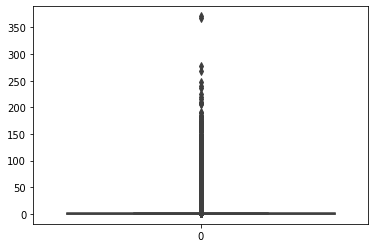

In [22]:
# draw boxplots to visualize outliers
sns.boxplot(data=data.Rainfall)
plt.show()

In [23]:
# # draw boxplots to visualize outliers
# sns.boxplot(data=data.Evaporation)
# plt.show()

In [24]:
# # draw boxplots to visualize outliers
# sns.boxplot(data=data.WindSpeed3pm)
# plt.show()

In [25]:
# # draw boxplots to visualize outliers
# sns.boxplot(data=data.WindSpeed9am)
# plt.show()

The above boxplots confirm that there are lot of outliers in these variables.

#### Check the distribution of variables
- Now, I will plot the histograms to check distributions to find out if they are normal or skewed.

- If the variable follows normal distribution, then I will do Extreme Value Analysis otherwise if they are skewed, I will find IQR (Interquantile range).

In [70]:
# data.Rainfall

In [26]:
# sns.distplot(x=data.Rainfall,bins=40);

In [27]:
# sns.distplot(x=data.Evaporation,bins=40);
# # sns.distplot(x=data.Rainfall,bins=40);

We can see that all the four variables are skewed. So, I will use interquantile range to find outliers.

In [73]:
# find outliers for Rainfall variable

IQR = data.Rainfall.quantile(0.75) - data.Rainfall.quantile(0.25)
Lower_fence = data.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = data.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -2.4000000000000004 or > 3.2


> **Note:** For Rainfall, the minimum and maximum values are 0.0 and 371.0. So, the outliers are values > 3.2.

In [28]:
# # find outliers for Evaporation variable

# IQR = data.Evaporation.quantile(0.75) - data.Evaporation.quantile(0.25)
# Lower_fence = data.Evaporation.quantile(0.25) - (IQR * 3)
# Upper_fence = data.Evaporation.quantile(0.75) + (IQR * 3)
# print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

> **Note:** For Evaporation, the minimum and maximum values are 0.0 and 145.0. So, the outliers are values > 21.8.

In [29]:
# # find outliers for WindSpeed9am variable

# IQR = data.WindSpeed9am.quantile(0.75) - data.WindSpeed9am.quantile(0.25)
# Lower_fence = data.WindSpeed9am.quantile(0.25) - (IQR * 3)
# Upper_fence = data.WindSpeed9am.quantile(0.75) + (IQR * 3)
# print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

> **Note:** For WindSpeed9am, the minimum and maximum values are 0.0 and 130.0. So, the outliers are values > 55.0.

In [30]:
# # find outliers for WindSpeed3pm variable

# IQR = data.WindSpeed3pm.quantile(0.75) - data.WindSpeed3pm.quantile(0.25)
# Lower_fence = data.WindSpeed3pm.quantile(0.25) - (IQR * 3)
# Upper_fence = data.WindSpeed3pm.quantile(0.75) + (IQR * 3)
# print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


> **Note:**
    For WindSpeed3pm, the minimum and maximum values are 0.0 and 87.0. So, the outliers are values > 57.0.

#### Interpretation
From the above correlation heat map, we can conclude that :-

- MinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 0.74).

- MinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient = 0.71).

- MinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.90).

- MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.89).

- MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.98).

- WindGustSpeed and WindSpeed3pm variables are highly positively correlated (correlation coefficient = 0.69).

- Pressure9am and Pressure3pm variables are strongly positively correlated (correlation coefficient = 0.96).

- Temp9am and Temp3pm variables are strongly positively correlated (correlation coefficient = 0.86).

#### Interpretation
- I have defined a variable `num_var` which consists of MinTemp, MaxTemp, Temp9am, Temp3pm, WindGustSpeed, WindSpeed3pm, Pressure9am and Pressure3pm variables.
- The above pair plot shows relationship between these variables.

#### Drop `Date` column from the dataset

In [81]:
data.drop(columns=['Date'], axis=1, inplace=True)

In [82]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008


## Linear Regression vs. Logistic Regression
Here, we'll use _logistic regression_, which is better suited for _classification_ problems like predicting whether it will rain tomorrow. Identifying whether a given problem is a _classfication_ or _regression_ problem is an important first step in machine learning.


### Classification Problems


Problems where each input must be assigned a discrete category (also called label or class) are known as _classification problems_. 

Here are some examples of classification problems:

- [Rainfall prediction](https://kaggle.com/jsphyg/weather-dataset-rattle-package): Predicting whether it will rain tomorrow using today's weather data (classes are "Will Rain" and "Will Not Rain")
- [Breast cancer detection](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data): Predicting whether a tumor  is "benign" (noncancerous) or "malignant" (cancerous) using information like its radius, texture etc.
- [Loan Repayment Prediction](https://www.kaggle.com/c/home-credit-default-risk) - Predicting whether applicants will repay a home loan based on factors like age, income, loan amount, no. of children etc.
- [Handwritten Digit Recognition](https://www.kaggle.com/c/digit-recognizer) - Identifying which digit from 0 to 9 a picture of handwritten text represents.

Can you think of some more classification problems?

> **EXERCISE**: Replicate the steps followed in this notebook with each of the above datasets.


Classification problems can be binary (yes/no) or multiclass (picking one of many classes).


### Linear Regression for Solving Regression Problems

Linear regression is a commonly used technique for solving regression problems. In a linear regression model, the target is modeled as a linear combination (or weighted sum) of input features. The predictions from the model are evaluated using a loss function like the Root Mean Squared Error (RMSE).


Here's a visual summary of how a linear regression model is structured:

<img src="https://i.imgur.com/iTM2s5k.png" width="480">


For a mathematical discussion of linear regression, watch [this YouTube playlist](https://www.youtube.com/watch?v=kHwlB_j7Hkc&list=PLJs7lEb1U5pYnrI0Wn4mzPmppVqwERL_4&index=1)


### Logistic Regression for Solving Classification Problems

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">


The output of the sigmoid function is called a logistic, hence the name _logistic regression_. For a mathematical discussion of logistic regression, sigmoid activation and cross entropy, check out [this YouTube playlist](https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy&index=1). Logistic regression can also be applied to multi-class classification problems, with a few modifications.


### Machine Learning Workflow

Whether we're solving a regression problem using linear regression or a classification problem using logistic regression, the workflow for training a model is exactly the same:

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">


Classification and regression are both supervised machine learning problems, because they use labeled data. Machine learning applied to unlabeled data is known as unsupervised learning ([image source](https://au.mathworks.com/help/stats/machine-learning-in-matlab.html)). 

<img src="https://i.imgur.com/1EMQmAw.png" width="480">


In this tutorial, we'll train a _logistic regression_ model using the Rain in Australia dataset to predict whether or not it will rain at a location tomorrow, using today's data. This is a _binary classification_ problem.

## (Optional) Working with a Sample
When working with massive datasets containing millions of rows, it's a good idea to work with a sample initially, to quickly set up your model training notebook. If you'd like to work with a sample, just set the value of `use_sample` to `True`.

In [83]:
use_sample = False

In [84]:
# data.shape

In [85]:
sample_fraction = .1
if use_sample:
    data = data.sample(frac=sample_fraction).copy()

In [86]:
data.shape

(142193, 23)

Make sure to set `use_sample` to `False` and re-run the notebook end-to-end once you're ready to use the entire dataset.

## Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique. 


2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. [Learn more here.](https://www.fast.ai/2017/11/13/validation-sets/)


3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


<img src="https://i.imgur.com/j8eITrK.png" width="480">


As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.


When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the `train_test_split` utility from `scikit-learn`. Learn more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
train_val_df, test_df = train_test_split(data, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [33]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (87276, 23)
val_df.shape : (29092, 23)
test_df.shape : (29092, 23)


In [34]:
# data.columns
data.Year>2015

0         False
1         False
2         False
3         False
4         False
          ...  
145455     True
145456     True
145457     True
145458     True
145459     True
Name: Year, Length: 145460, dtype: bool

However, while working with dates, it's often a better idea to separate the `training`, `validation` and `test` sets with time, so that the model is trained on data from the past and evaluated on data from the future.

For the current dataset, we can use the year column. We'll pick the last two years for the `test set`, and one year before it for the `validation set`.

In [35]:
train_df = data[data.Year < 2015]
val_df = data[data.Year == 2015]
test_df = data[data.Year > 2015]

In [36]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (101018, 23)
val_df.shape : (17885, 23)
test_df.shape : (26557, 23)


While not a perfect 60-20-20 split, we have ensured that the test validation and test sets both contain data for all 12 months of the year.

## Identifying Input and Target Columns

Often, not all the columns in a dataset are useful for training a model. In the current dataset, we can ignore the `Date` column, since we only want to weather conditions to make a prediction about whether it will rain the next day.

Let's create a list of input columns, and also identify the target column.

In [37]:
input_cols = list(train_df.columns.drop(['RainTomorrow']))
target_col = 'RainTomorrow'

In [39]:
input_cols
target_col

'RainTomorrow'

We can now create inputs and targets for the training, validation and test sets for further processing and model training.

In [40]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [41]:
train_inputs.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,2008


In [42]:
train_targets.head()

0    No
1    No
2    No
3    No
4    No
Name: RainTomorrow, dtype: object

In [43]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [44]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

Let's also identify which of the columns are numerical and which ones are categorical. This will be useful later, as we'll need to convert the categorical data to numbers for training a logistic regression model.

In [46]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.to_list()
# numeric_cols

In [48]:
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()
# categorical_cols

In [49]:
# Let's view some statistics for the numeric columns.
train_inputs[numeric_cols].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008


In [50]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year
count,100282.000000,100484.000000,98987.00000,62532.000000,59010.000000,93395.000000,99564.000000,99556.000000,99428.000000,99514.000000,91218.000000,91252.000000,63913.000000,62888.000000,99913.000000,100040.000000,101018.000000
mean,11.992238,22.981287,2.38158,5.282092,7.593952,40.265892,14.127898,18.777813,68.694231,51.552445,1017.520623,1015.144023,4.316712,4.421559,16.812393,21.506126,2011.440318
std,6.336489,6.994097,8.51861,3.949170,3.790480,13.729898,9.008386,8.882133,18.981489,20.739573,7.075771,6.998990,2.867476,2.693835,6.393443,6.832900,1.801368
min,-8.500000,-4.100000,0.00000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-5.900000,-5.100000,2007.000000
25%,7.500000,17.800000,0.00000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.400000,1.000000,2.000000,12.200000,16.500000,2010.000000
50%,11.800000,22.400000,0.00000,4.600000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.500000,20.900000,2011.000000
75%,16.600000,27.900000,0.80000,7.200000,10.600000,48.000000,20.000000,24.000000,83.000000,66.000000,1022.300000,1019.900000,7.000000,7.000000,21.300000,26.100000,2013.000000
max,33.900000,48.100000,371.00000,82.400000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.100000,2014.000000


In [104]:
# Let's view some statistics for the categorical columns.
train_inputs[categorical_cols].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,Albury,W,W,WNW,No
1,Albury,WNW,NNW,WSW,No
2,Albury,WSW,W,WSW,No
3,Albury,NE,SE,E,No
4,Albury,W,ENE,NW,No


Do the ranges of the numeric columns seem reasonable? If not, we may have to do some data cleaning as well.

Let's also check the number of categories in each of the categorical columns.

In [105]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

## Imputing Missing Numeric Data

Machine learning models can't work with missing numerical data. The process of filling missing values is called imputation.

<img src="https://i.imgur.com/W7cfyOp.png" width="480">

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`.

![](images/Data-Preprocessing-1-2048x1014.png)

In [51]:
from sklearn.impute import SimpleImputer

In [52]:
imputer = SimpleImputer(strategy='mean')

Before we perform imputation, let's check the no. of missing values in each numeric column.

In [53]:
data[numeric_cols].isna().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
dtype: int64

These values are spread across the training, test and validation sets. You can also check the no. of missing values individually for `train_inputs`, `val_inputs` and `test_inputs`.

In [54]:
train_inputs[numeric_cols].isna().sum()

MinTemp            736
MaxTemp            534
Rainfall          2031
Evaporation      38486
Sunshine         42008
WindGustSpeed     7623
WindSpeed9am      1454
WindSpeed3pm      1462
Humidity9am       1590
Humidity3pm       1504
Pressure9am       9800
Pressure3pm       9766
Cloud9am         37105
Cloud3pm         38130
Temp9am           1105
Temp3pm            978
Year                 0
dtype: int64

In [55]:
test_inputs[numeric_cols].isna().sum()

MinTemp            333
MaxTemp            316
Rainfall           577
Evaporation      15613
Sunshine         18386
WindGustSpeed     1636
WindSpeed9am       183
WindSpeed3pm      1186
Humidity9am        470
Humidity3pm       1959
Pressure9am       2869
Pressure3pm       2870
Cloud9am         11678
Cloud3pm         13700
Temp9am            259
Temp3pm           1778
Year                 0
dtype: int64

In [56]:
val_inputs[numeric_cols].isna().sum()

MinTemp           416
MaxTemp           411
Rainfall          653
Evaporation      8691
Sunshine         9441
WindGustSpeed    1004
WindSpeed9am      130
WindSpeed3pm      414
Humidity9am       594
Humidity3pm      1044
Pressure9am      2396
Pressure3pm      2392
Cloud9am         7105
Cloud3pm         7528
Temp9am           403
Temp3pm           853
Year                0
dtype: int64

> The first step in imputation is to `fit` the imputer to the data i.e. compute the chosen statistic (e.g. mean) for each column in the dataset. 

In [57]:
imputer.fit(data[numeric_cols])

SimpleImputer()

After calling `fit`, the computed statistic for each column is stored in the `statistics_` property of `imputer`.

In [58]:
list(imputer.statistics_)

[12.19403438096892,
 23.22134827564685,
 2.3609181499166656,
 5.468231522922462,
 7.6111775206611565,
 40.03523007167319,
 14.043425914971502,
 18.662656778887342,
 68.88083133761887,
 51.5391158755046,
 1017.6499397983052,
 1015.2558888309618,
 4.4474612602152455,
 4.509930082924903,
 16.990631415587398,
 21.68339031800974,
 2012.7697511343324]

In [59]:
pd.DataFrame({"col_name":numeric_cols, "statistics_":list(imputer.statistics_)})

,col_name,statistics_
0,MinTemp,12.194034
1,MaxTemp,23.221348
2,Rainfall,2.360918
3,Evaporation,5.468232
4,Sunshine,7.611178
5,WindGustSpeed,40.035230
6,WindSpeed9am,14.043426
7,WindSpeed3pm,18.662657
8,Humidity9am,68.880831
9,Humidity3pm,51.539116


The missing values in the training, test and validation sets can now be filled in using the `transform` method of `imputer`.

In [60]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
train_inputs[numeric_cols].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,2008.0
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,2008.0
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,2008.0
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,2008.0
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,2008.0


In [61]:
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
val_inputs[numeric_cols].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year
2133,11.4,33.5,0.0,5.468232,7.611178,30.0,7.0,11.0,45.0,14.0,1013.5,1011.0,4.447461,4.50993,21.0,32.7,2015.0
2134,15.5,39.6,0.0,5.468232,7.611178,56.0,9.0,9.0,45.0,12.0,1016.0,1012.4,4.447461,4.50993,25.6,38.2,2015.0
2135,17.1,38.3,0.0,5.468232,7.611178,48.0,20.0,20.0,35.0,19.0,1017.9,1012.3,4.447461,4.50993,29.2,37.0,2015.0
2136,26.0,33.1,0.0,5.468232,7.611178,41.0,7.0,7.0,46.0,37.0,1013.6,1012.1,8.000000,5.00000,27.4,30.9,2015.0
2137,19.0,35.2,0.0,5.468232,7.611178,33.0,7.0,9.0,60.0,34.0,1017.4,1014.7,8.000000,4.50993,25.6,32.5,2015.0


In [62]:
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])
test_inputs[numeric_cols].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year
2498,20.4,37.6,0.0,5.468232,7.611178,54.0,0.0,7.0,46.0,17.0,1013.4,1009.2,7.0,3.0,26.1,36.7,2016.0
2499,20.9,33.6,0.4,5.468232,7.611178,50.0,9.0,17.0,54.0,30.0,1011.1,1008.4,8.0,8.0,24.8,31.7,2016.0
2500,18.4,23.1,2.2,5.468232,7.611178,48.0,11.0,39.0,62.0,67.0,1014.0,1014.8,8.0,8.0,21.8,19.5,2016.0
2501,17.3,23.7,15.6,5.468232,7.611178,39.0,9.0,17.0,74.0,65.0,1017.9,1016.5,8.0,8.0,19.2,21.6,2016.0
2502,15.5,22.9,6.8,5.468232,7.611178,31.0,6.0,9.0,92.0,63.0,1016.3,1013.9,8.0,8.0,17.2,22.2,2016.0


The missing values are now filled in with the mean of each column.

In [63]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
dtype: int64

> **EXERCISE**: Apply some other imputation techniques and observe how they change the results of the model. You can learn more about other imputation techniques here: https://scikit-learn.org/stable/modules/impute.html

## Impute Categorical Missing Data

In [154]:
# categorical_cols
# cat_columns
# data[categorical_cols].dropna(inplace=True,)


In [64]:
imputer_cat = SimpleImputer(strategy="most_frequent")
imputer_cat.fit(data[categorical_cols])

SimpleImputer(strategy='most_frequent')

In [65]:
list(imputer_cat.statistics_)

['Canberra', 'W', 'N', 'SE', 'No']

In [66]:
train_inputs[categorical_cols] = imputer_cat.transform(train_inputs[categorical_cols])
val_inputs[categorical_cols] = imputer_cat.transform(val_inputs[categorical_cols])
test_inputs[categorical_cols] = imputer_cat.transform(test_inputs[categorical_cols])

In [67]:
train_inputs[categorical_cols].isna().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [68]:
data[categorical_cols] = imputer_cat.transform(data[categorical_cols])
data[categorical_cols].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,Albury,W,W,WNW,No
1,Albury,WNW,NNW,WSW,No
2,Albury,WSW,W,WSW,No
3,Albury,NE,SE,E,No
4,Albury,W,ENE,NW,No


## FE: Scaling Numeric Features

Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.

In [69]:
data[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2012.769751
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,2.537684
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,2007.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,2011.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,2013.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,2015.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,2017.000000


Let's use `MinMaxScaler` from `sklearn.preprocessing` to scale values to the $(0,1)$ range.

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [126]:
?MinMaxScaler

In [71]:
scaler = MinMaxScaler()

First, we `fit` the scaler to the data i.e. compute the range of values for each numeric column.

In [72]:
scaler.fit(data[numeric_cols])

MinMaxScaler()

We can now inspect the minimum and maximum values in each column.

In [73]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[-8.5,
 -4.8,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 980.5,
 977.1,
 0.0,
 0.0,
 -7.2,
 -5.4,
 2007.0]

In [74]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[33.9,
 48.1,
 371.0,
 145.0,
 14.5,
 135.0,
 130.0,
 87.0,
 100.0,
 100.0,
 1041.0,
 1039.6,
 9.0,
 9.0,
 40.2,
 46.7,
 2017.0]

In [75]:
pd.DataFrame({"col_name":numeric_cols, "maximum":list(scaler.data_max_),"minimum":list(scaler.data_min_)})

,col_name,maximum,minimum
0,MinTemp,33.9,-8.5
1,MaxTemp,48.1,-4.8
2,Rainfall,371.0,0.0
3,Evaporation,145.0,0.0
4,Sunshine,14.5,0.0
5,WindGustSpeed,135.0,6.0
6,WindSpeed9am,130.0,0.0
7,WindSpeed3pm,87.0,0.0
8,Humidity9am,100.0,0.0
9,Humidity3pm,100.0,0.0


We can now separately scale the training, validation and test sets using the `transform` method of `scaler`.

In [76]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

We can now verify that values in each column lie in the range $(0,1)$

In [77]:
train_inputs[numeric_cols].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year
0,0.516509,0.523629,0.001617,0.037712,0.524909,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.501103,0.508439,0.522073,0.1
1,0.375000,0.565217,0.000000,0.037712,0.524909,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.494162,0.501103,0.514768,0.570058,0.1
2,0.504717,0.576560,0.000000,0.037712,0.524909,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.494162,0.222222,0.594937,0.548944,0.1
3,0.417453,0.620038,0.000000,0.037712,0.524909,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.494162,0.501103,0.533755,0.612284,0.1
4,0.613208,0.701323,0.002695,0.037712,0.524909,0.271318,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,0.1


In [78]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year
count,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000
mean,0.483342,0.525190,0.006418,0.036917,0.524215,0.265492,0.108667,0.215818,0.686972,0.515522,0.612118,0.608877,0.484971,0.494991,0.506632,0.516465,0.444032
std,0.148901,0.131864,0.022729,0.021437,0.199797,0.102340,0.068795,0.101352,0.188315,0.205846,0.111139,0.106434,0.253523,0.236211,0.134144,0.130514,0.180137
min,0.000000,0.013233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030400,0.000000,0.000000,0.027426,0.005758,0.000000
25%,0.377358,0.429112,0.000000,0.026207,0.517241,0.193798,0.053846,0.149425,0.570000,0.370000,0.543802,0.542400,0.333333,0.333333,0.409283,0.422265,0.300000
50%,0.478774,0.514178,0.000000,0.037712,0.524909,0.255814,0.100000,0.218391,0.690000,0.520000,0.614049,0.610494,0.494162,0.501103,0.502110,0.506718,0.400000
75%,0.589623,0.616257,0.002695,0.037712,0.634483,0.310078,0.146154,0.275862,0.830000,0.650000,0.680992,0.675200,0.666667,0.666667,0.599156,0.604607,0.600000
max,1.000000,1.000000,1.000000,0.568276,0.986207,1.000000,0.669231,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988484,0.700000


Learn more about scaling techniques here: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

## Encoding Categorical Data

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column. 

In [79]:
data[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

We can perform one hot encoding using the `OneHotEncoder` class from `sklearn.preprocessing`.

In [80]:
from sklearn.preprocessing import OneHotEncoder

In [137]:
?OneHotEncoder

In [81]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder

OneHotEncoder(handle_unknown='ignore', sparse=False)

First, we `fit` the encoder to the data i.e. identify the full list of categories across all categorical columns.

In [82]:
train_inputs[categorical_cols].isna().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [83]:
encoder.fit_transform(train_inputs[categorical_cols])

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [84]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 

The encoder has created a list of categories for each of the categorical columns in the dataset. 

We can generate column names for each individual category using `get_feature_names`.

In [85]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

All of the above columns will be added to `train_inputs`, `val_inputs` and `test_inputs`.

To perform the encoding, we use the `transform` method of `encoder`.

In [86]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

We can verify that these new columns have been added to our training, test and validation sets.

In [87]:
pd.set_option('display.max_columns', None)

In [88]:
test_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
2498,Albury,0.681604,0.801512,0.000000,0.037712,0.524909,ENE,0.372093,N,ESE,0.000000,0.080460,0.46,0.17,0.543802,0.5136,0.777778,0.333333,0.702532,0.808061,No,0.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2499,Albury,0.693396,0.725898,0.001078,0.037712,0.524909,SSE,0.341085,SSE,SE,0.069231,0.195402,0.54,0.30,0.505785,0.5008,0.888889,0.888889,0.675105,0.712092,No,0.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2500,Albury,0.634434,0.527410,0.005930,0.037712,0.524909,ENE,0.325581,ESE,ENE,0.084615,0.448276,0.62,0.67,0.553719,0.6032,0.888889,0.888889,0.611814,0.477927,Yes,0.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2501,Albury,0.608491,0.538752,0.042049,0.037712,0.524909,SSE,0.255814,SE,SSE,0.069231,0.195402,0.74,0.65,0.618182,0.6304,0.888889,0.888889,0.556962,0.518234,Yes,0.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

## Saving Processed Data to Disk

It can be useful to save processed data to disk, especially for really large datasets, to avoid repeating the preprocessing steps every time you start the Jupyter notebook. The parquet format is a fast and efficient format for saving and loading Pandas dataframes.

In [171]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (98988, 121)
train_targets: (98988,)
val_inputs: (17231, 121)
val_targets: (17231,)
test_inputs: (25974, 121)
test_targets: (25974,)


In [172]:
!pip install pyarrow --quiet

In [173]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [174]:
!ls

 dataset			      test_targets.parquet
 images				      train_inputs.parquet
'Model Selection.pptx'		      train_targets.parquet
'Rain Detection in Australia.ipynb'   val_inputs.parquet
 test_inputs.parquet		      val_targets.parquet


In [175]:
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

CPU times: user 36.6 ms, sys: 19.7 ms, total: 56.3 ms
Wall time: 52.9 ms


We can read the data back using `pd.read_parquet`.

In [89]:
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

CPU times: user 213 ms, sys: 113 ms, total: 326 ms
Wall time: 92.8 ms


Let's verify that the data was loaded properly.

In [90]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (98988, 121)
train_targets: (98988,)
val_inputs: (17231, 121)
val_targets: (17231,)
test_inputs: (25974, 121)
test_targets: (25974,)


In [91]:
val_inputs.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
2133,Albury,0.469340,0.724008,0.0,0.037723,0.525852,WSW,0.186047,ESE,W,0.053846,0.126437,0.45,0.14,0.545455,0.5424,0.493021,0.500352,0.594937,0.731286,No,0.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2134,Albury,0.566038,0.839319,0.0,0.037723,0.525852,NE,0.387597,ESE,ESE,0.069231,0.103448,0.45,0.12,0.586777,0.5648,0.493021,0.500352,0.691983,0.836852,No,0.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2135,Albury,0.603774,0.814745,0.0,0.037723,0.525852,NNE,0.325581,NE,N,0.153846,0.229885,0.35,0.19,0.618182,0.5632,0.493021,0.500352,0.767932,0.813820,No,0.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2136,Albury,0.813679,0.716446,0.0,0.037723,0.525852,NNE,0.271318,ESE,W,0.053846,0.080460,0.46,0.37,0.547107,0.5600,0.888889,0.555556,0.729958,0.696737,No,0.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

## Training a Logistic Regression Model

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">

To train a logistic regression model, we can use the `LogisticRegression` class from Scikit-learn.

In [92]:
from sklearn.linear_model import LogisticRegression

In [180]:
?LogisticRegression

In [93]:
model = LogisticRegression(solver='liblinear')

We can train the model using `model.fit`.

In [96]:
train_inputs[num_columns+encoded_cols].head()
# train_targets

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,0.516509,0.523629,0.001617,0.037723,0.525852,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.500352,0.508439,0.522073,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.375000,0.565217,0.000000,0.037723,0.525852,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.493021,0.500352,0.514768,0.570058,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.504717,0.576560,0.000000,0.037723,0.525852,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.493021,0.222222,0.594937,0.548944,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.417453,0.620038,0.000000,0.037723,0.525852,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.493021,0.500352,0.533755,0.612284,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.613208,0.701323,0.002695,0.037723,0.525852,0.271318,0.0538

In [97]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

`model.fit` uses the following workflow for training the model ([source](https://www.deepnetts.com/blog/from-basic-machine-learning-to-deep-learning-in-5-minutes.html)):

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

For a mathematical discussion of logistic regression, sigmoid activation and cross entropy, check out [this YouTube playlist](https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy&index=1). Logistic regression can also be applied to multi-class classification problems, with a few modifications.


Let's check the weights and biases of the trained model.

In [98]:
print(numeric_cols + encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'L

In [99]:
print(model.coef_.tolist())

[[0.8993026511540984, -3.202761445095742, 3.476063572916348, 0.6957912952245031, -1.5991904913221735, 6.678918296863904, -0.677838310586982, -1.4756364489176992, 0.34757277885897053, 5.959900600148706, 5.3665111239147825, -9.057790114991242, -0.13085538179769812, 1.2672168884819752, 0.5577466606843658, 2.2165174606736597, -0.019949939274923747, 0.6310992712493911, -0.35162722297114096, 0.4010884673589763, -0.011058869513517896, 0.3105972318590743, -0.3930955818768607, 0.12434928913946855, 0.4109753139068186, -0.044408125950976575, 0.017373597317352746, 0.24195318795347207, -0.006975698150907441, -0.09526672743123095, -0.5000557743146358, -0.18324228473631338, -0.6134324206339287, -0.7467440345795543, -0.31107338149838626, -0.02050060202342237, -0.58074996991012, 0.03726093235144444, 0.058290454649000026, 0.029755500572843332, -0.8978939498316143, -0.28086929770142344, -0.04267043562761134, -0.49417893845164473, -0.5155982291262124, -0.10978019899923716, 0.5238781853849005, 0.4040123279

In [100]:
print(model.intercept_)

[-2.43571771]


Each weight is applied to the value in a specific column of the input. Higher the weight, greater the impact of the column on the prediction.

In [101]:
pd.DataFrame({"features":(numeric_cols+encoded_cols),
             'weights':model.coef_.tolist()[0]
             })

,features,weights
0,MinTemp,0.899303
1,MaxTemp,-3.202761
2,Rainfall,3.476064
3,Evaporation,0.695791
4,Sunshine,-1.599190
...,...,...
111,WindDir3pm_W,-0.197395
112,WindDir3pm_WNW,-0.059465
113,WindDir3pm_WSW,-0.289570
114,RainToday_No,-1.440350


In [102]:
weights_df = pd.DataFrame({"features":(numeric_cols+encoded_cols),
             'weights':model.coef_.tolist()[0]
             })
weights_df.head()

,features,weights
0,MinTemp,0.899303
1,MaxTemp,-3.202761
2,Rainfall,3.476064
3,Evaporation,0.695791
4,Sunshine,-1.599190


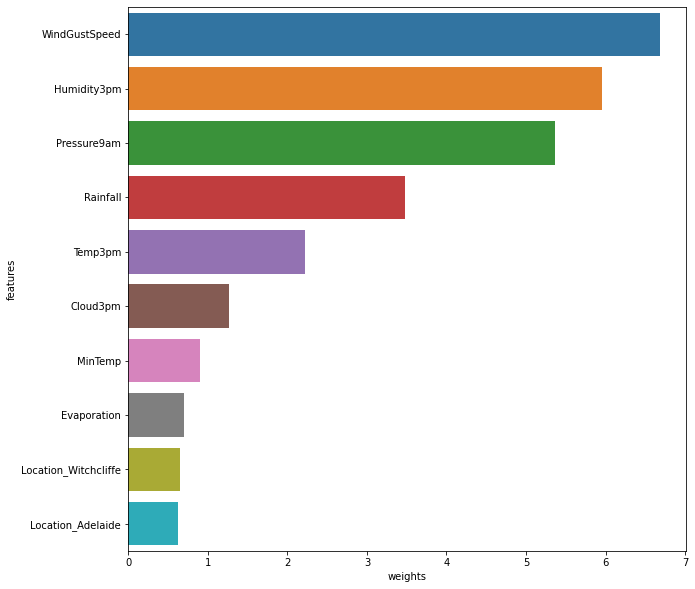

In [103]:
plt.figure(figsize=(10,10))
sns.barplot(x='weights', y='features', data=weights_df.sort_values('weights', ascending=False).head(10));

## Making Predictions and Evaluating the Model

We can now use the trained model to make predictions on the training, test 

In [104]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [107]:
train_preds = model.predict(X_train)
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [108]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 98988, dtype: object

We can output a probabilistic prediction using `predict_proba`.


In [109]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.94044787, 0.05955213],
       [0.94269796, 0.05730204],
       [0.9616706 , 0.0383294 ],
       ...,
       [0.98739855, 0.01260145],
       [0.98338831, 0.01661169],
       [0.87032144, 0.12967856]])

The numbers above indicate the probabilities for the target classes "No" and "Yes".

In [110]:
model.classes_

array(['No', 'Yes'], dtype=object)

We can test the accuracy of the model's predictions by computing the percentage of matching values in `train_preds` and `train_targets`.

This can be done using the `accuracy_score` function from `sklearn.metrics`.

In [111]:
from sklearn.metrics import accuracy_score

In [112]:
accuracy_score(train_targets, train_preds)

0.8492039439123934

The model achieves an accuracy of 84.9% on the training set. We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

<img src="https://i.imgur.com/UM28BCN.png" width="480">

In [113]:
from sklearn.metrics import confusion_matrix

In [114]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.94502314, 0.05497686],
       [0.48063546, 0.51936454]])

In [116]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 84.92%


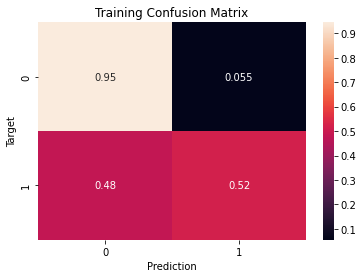

In [117]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')


Let's compute the model's accuracy on the validation and test sets too.

Accuracy: 85.27%


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

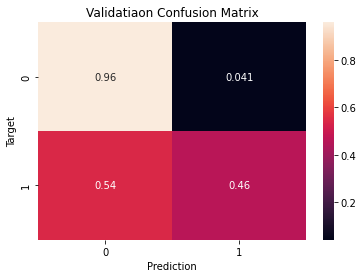

In [118]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')
val_preds

Accuracy: 84.02%


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

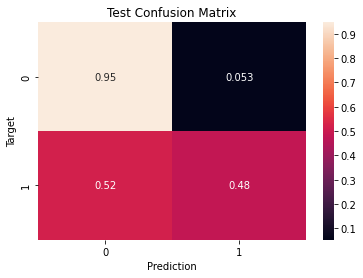

In [119]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')
test_preds

The accuracy of the model on the test and validation set are above 84%, which suggests that our model generalizes well to data it hasn't seen before. 

But how good is 84% accuracy? While this depends on the nature of the problem and on business requirements, a good way to verify whether a model has actually learned something useful is to compare its results to a "random" or "dumb" model.

Let's create two models: one that guesses randomly and another that always return "No". Both of these models completely ignore the inputs given to them.

In [205]:
X_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
2498,0.681604,0.801512,0.000000,0.037723,0.525852,0.372093,0.000000,0.080460,0.46,0.17,0.543802,0.5136,0.777778,0.333333,0.702532,0.808061,0.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2499,0.693396,0.725898,0.001078,0.037723,0.525852,0.341085,0.069231,0.195402,0.54,0.30,0.505785,0.5008,0.888889,0.888889,0.675105,0.712092,0.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2500,0.634434,0.527410,0.005930,0.037723,0.525852,0.325581,0.084615,0.448276,0.62,0.67,0.553719,0.6032,0.888889,0.888889,0.611814,0.477927,0.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2501,0.608491,0.538752,0.042049,0.037723,0.525852,0.255814,0.069231,0.195402,0.74,0.65,0.618182,0.6304,0.888889,0.888889,0.556962,0.518234,0.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2502,0.566038,0.523629,0.0183

In [206]:
def random_guess(inputs):
    return np.random.choice(["No", "Yes"], len(inputs))
random_guess(X_test)

array(['No', 'No', 'No', ..., 'No', 'Yes', 'Yes'], dtype='<U3')

In [208]:
def all_no(inputs):
    return np.full(len(inputs), "No")
all_no(X_test)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U2')

Let's check the accuracies of these two models on the test set.

In [209]:
accuracy_score(test_targets, random_guess(X_test))

0.5067760067760068

In [210]:
accuracy_score(test_targets, all_no(X_test))

0.7710787710787711

### Classification Report using Logistic Regression

In [120]:
from sklearn.metrics import classification_report, confusion_matrix

In [126]:
print("Classification Report of training data\n")
print(classification_report(train_targets, train_preds))

Classification Report of training data

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     76705
         Yes       0.73      0.52      0.61     22283

    accuracy                           0.85     98988
   macro avg       0.80      0.73      0.76     98988
weighted avg       0.84      0.85      0.84     98988



In [127]:
print("Classification Report of training data\n")
print(classification_report(test_targets, test_preds))

Classification Report of training data

              precision    recall  f1-score   support

          No       0.86      0.95      0.90     20028
         Yes       0.73      0.48      0.58      5946

    accuracy                           0.84     25974
   macro avg       0.79      0.71      0.74     25974
weighted avg       0.83      0.84      0.83     25974



In [128]:
print("Classification Report of training data\n")
print(classification_report(val_targets, val_preds))

Classification Report of training data

              precision    recall  f1-score   support

          No       0.87      0.96      0.91     13583
         Yes       0.75      0.46      0.57      3648

    accuracy                           0.85     17231
   macro avg       0.81      0.71      0.74     17231
weighted avg       0.84      0.85      0.84     17231



### Pipeline for GridSearchCV using Logistic Regression

In [130]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipe = Pipeline(steps=[('logistic_Reg', model)])


In [133]:
# 'n_components' signifies the number of components to keep after reducing the dimension.

n_components = list(range(1,train_inputs.shape[1]+1,1))
# n_components

In [134]:
# Logistic Regression requires two parameters 'C' and 'penalty' to be optimised by GridSearchCV. So we have set these two parameters as a list of values form which GridSearchCV will select the best value of parameter.
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']

In [135]:
parameters = dict(pca__n_components=n_components,
                      logistic_Reg__C=C,
                      logistic_Reg__penalty=penalty)


##### Before using GridSearchCV, lets have a look on the important parameters.

- estimator: In this we have to pass the models or functions on which we want to use GridSearchCV
- param_grid: Dictionary or list of parameters of models or function in which GridSearchCV have to select the best.
- Scoring: It is used as a evaluating metric for the model performance to decide the best hyperparameters, if not especified then it uses estimator score.



In [138]:
# # Making an object clf_GS for GridSearchCV and fitting the dataset i.e X and y

# clf_GS = GridSearchCV(pipe, parameters)
# clf_GS.fit(tr, y)

In [139]:
# Now we are using print statements to print theesults. It will give the values of hyperparameters as a result.

# print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
# print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
# print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
# print(); print(clf_GS.best_estimator_.get_params()['logistic_Reg'])


Our random model achieves an accuracy of 50% and our "always No" model achieves an accuracy of 77%. 

Thankfully, our model is better than a "dumb" or "random" model! This is not always the case, so it's a good practice to benchmark any model you train against such baseline models.

> **EXERCISE**: Initialize the `LogisticRegression` model with different arguments and try to achieve a higher accuracy. The arguments used for initializing the model are called hyperparameters (to differentiate them from weights and biases - parameters that are learned by the model during training). You can find the full list of arguments here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 

> **EXERCISE**: Train a logistic regression model using just the numeric columns from the dataset. Does it perform better or worse than the model trained above?

> **EXERCISE**: Train a logistic regression model using just the categorical columns from the dataset. Does it perform better or worse than the model trained above?

> **EXERCISE**: Train a logistic regression model without feature scaling. Also try a different strategy for missing data imputation. Does it perform better or worse than the model trained above?

# Support Vector Machine Classifier


### Support Vector Machines
Generally, Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

![](images/support-vector-machine-algorithm5.png)

## Support Vectors
Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

## Hyperplane
A hyperplane is a decision plane which separates between a set of objects having different class memberships.

## Margin
A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.


## How does SVM work?
The main objective is to segregate the given dataset in the best possible way. The distance between the either nearest points is known as the margin. The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum marginal hyperplane in the following steps:

1. Generate hyperplanes which segregates the classes in the best way. Left-hand side figure showing three hyperplanes black, blue and orange. Here, the blue and orange have higher classification error, but the black is separating the two classes correctly.

2. Select the right hyperplane with the maximum segregation from the either nearest data points as shown in the right-hand side figure.<br>
![](images/images.png)

## SVM Kernels
The SVM algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. SVM uses a technique called the kernel trick. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. In other words, you can say that it converts nonseparable problem to separable problems by adding more dimension to it. It is most useful in non-linear separation problem. Kernel trick helps you to build a more accurate classifier.

* <b>Linear Kernel</b>  A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values.
> k(x,xi)=sum(x*xi)

* <b>Radial Basis Function Kernel </b>The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in infinite dimensional space.
> K(x,xi) = exp(-gamma * sum((x – xi^2))


## Generating Model

Let's build support vector machine model. First, import the SVM module and create support vector classifier object by passing argument kernel as the linear kernel in SVC() function.

Then, fit your model on train set using fit() and perform prediction on the test set using predict()

> #Import svm model<br>
> from sklearn import svm<br>
> 
> #Create a svm Classifier<br>
> clf = svm.SVC(kernel='linear') # Linear Kernel<br>
> 
> #Train the model using the training sets<br>
> clf.fit(X_train, y_train)<br>
> 
> #Predict the response for test dataset<br>
> y_pred = clf.predict(X_test)<br>

![](images/kernel.png)

In [249]:
from sklearn import svm

In [259]:
clf = svm.SVC(kernel='linear')
clf.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

SVC(kernel='linear')

In [252]:
print(numeric_cols + encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'L

In [255]:
print(clf.coef_)

In [256]:
clf.intercept_

array([1.38082244])

In [258]:
clf.coef_

AttributeError: coef_ is only available when using a linear kernel

In [ ]:
weights_df = pd.DataFrame({"features":(numeric_cols+encoded_cols),
             'weights':model.coef_.tolist()[0]
             })
weights_df.head()

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='weights', y='features', data=weights_df.sort_values('weights', ascending=False).head(10));


### SVM: Making Predictions and Evaluating the Model
We can now use the trained model to make predictions on the training, test

In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [ ]:
train_preds = model.predict(X_train)
train_probs = model.predict_proba(X_train)
train_probs

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(train_targets, train_preds)
confusion_matrix(train_targets, train_preds, normalize='true')
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

train_preds = predict_and_plot(X_train, train_targets, 'Training')

In [ ]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')
val_preds

In [ ]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')
test_preds

## Cross Validation 
Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set.
The three steps involved in cross-validation are as follows :

- Reserve some portion of sample data-set.
- Using the rest data-set train the model.
- Test the model using the reserve portion of the data-set.


### Methods of Cross Validation

#### Validation
In this method, we perform training on the 50% of the given data-set and rest 50% is used for the testing purpose. The major drawback of this method is that we perform training on the 50% of the dataset, it may possible that the remaining 50% of the data contains some important information which we are leaving while training our model i.e higher bias.

#### LOOCV (Leave One Out Cross Validation)
In this method, we perform training on the whole data-set but leaves only one data-point of the available data-set and then iterates for each data-point. It has some advantages as well as disadvantages also.
An advantage of using this method is that we make use of all data points and hence it is low bias.
The major drawback of this method is that it leads to higher variation in the testing model as we are testing against one data point. If the data point is an outlier it can lead to higher variation. Another drawback is it takes a lot of execution time as it iterates over ‘the number of data points’ times.

#### K-Fold Cross Validation
In this method, we split the data-set into k number of subsets(known as folds) then we perform training on the all the subsets but leave one(k-1) subset for the evaluation of the trained model. In this method, we iterate k times with a different subset reserved for testing purpose each time.

![](images/grid_search_cross_validation.png)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]


In [ ]:
def compare_models_train_test():
    for model in models:
    # training the model
    model.fit(train_inputs[numeric_cols+encoded_cols], train_targets)
    # evaluating the model
    test_data_prediction = model.predict(X_train)
    accuracy = accuracy_score(train_targets, test_data_prediction)
    print('Accuracy score of the ', model, ' = ', accuracy)



In [ ]:
cv_score_lr = cross_val_score(LogisticRegression(max_iter=1000), train_inputs[numeric_cols+encoded_cols], train_targets, cv=5)
print(cv_score_lr)
mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)
mean_accuracy_lr = mean_accuracy_lr*100
mean_accuracy_lr = round(mean_accuracy_lr, 2)
print(mean_accuracy_lr)

In [ ]:
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]

In [ ]:
def compare_models_train_test():
    for model in models:
    # training the model
    model.fit(X_train, Y_train)
    # evaluating the model
    test_data_prediction = model.predict(X_test)
    accuracy = accuracy_score(Y_test, test_data_prediction)
    print('Accuracy score of the ', model, ' = ', accuracy)



In [ ]:
compare_models_train_test()

In [ ]:
cv_score_lr = cross_val_score(LogisticRegression(max_iter=1000), test_inputs[numeric_cols+encoded_cols], test_targets, cv=5)
print(cv_score_lr)
mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)
mean_accuracy_lr = mean_accuracy_lr*100
mean_accuracy_lr = round(mean_accuracy_lr, 2)
print(mean_accuracy_lr)

In [ ]:
cv_score_svc = cross_val_score(SVC(kernel='linear'), train_inputs[numeric_cols+encoded_cols], train_targets, cv=5)
print(cv_score_svc)
mean_accuracy_svc = sum(cv_score_svc)/len(cv_score_svc)
mean_accuracy_svc = mean_accuracy_svc*100
mean_accuracy_svc = round(mean_accuracy_svc, 2)
print(mean_accuracy_svc)

In [ ]:
# list of models
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]

In [ ]:
def compare_models_cross_validation():
    for model in models:
    cv_score = cross_val_score(model, test_inputs[numeric_cols+encoded_cols],Y, cv=5)
    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy, 2)
    print('Cross Validation accuracies for ', model, '=  ', cv_score)
    print('Accuracy % of the ', model, mean_accuracy)
    print('----------------------------------------------')


In [ ]:
compare_models_cross_validation()

## Hyperparameters in Machine Learning

Hyperparameters in Machine learning are those parameters that are explicitly defined by the user to control the learning process. These hyperparameters are used to improve the learning of the model, and their values are set before starting the learning process of the model.

#### What are hyperparameters?
In Machine Learning/Deep Learning, a model is represented by its parameters. In contrast, a training process involves selecting the best/optimal hyperparameters that are used by learning algorithms to provide the best result. So, what are these hyperparameters? The answer is, `Hyperparameters are defined as the parameters that are explicitly defined by the user to control the learning process.`

#### Some examples of Hyperparameters in Machine Learning

- The k in kNN or K-Nearest Neighbour algorithm
- Learning rate for training a neural network
- Train-test split ratio
- Batch Size
- Number of Epochs
- Branches in Decision Tree
- Number of clusters in Clustering Algorithm

#### Difference between Parameter and Hyperparameter?

There is always a big confusion between Parameters and hyperparameters or model hyperparameters. So, in order to clear this confusion, let's understand the difference between both of them and how they are related to each other.

**Model Parameters:**

Model parameters are configuration variables that are internal to the model, and a model learns them on its own. For example, W Weights or Coefficients of independent variables in the Linear regression model. or Weights or Coefficients of independent variables in SVM, weight, and biases of a neural network, cluster centroid in clustering. Some key points for model parameters are as follows:

- They are used by the model for making predictions.
- They are learned by the model from the data itself
- These are usually not set manually.
- These are the part of the model and key to a machine learning Algorithm.


#### Model Hyperparameters:

Hyperparameters are those parameters that are explicitly defined by the user to control the learning process. Some key points for model parameters are as follows:

- These are usually defined manually by the machine learning engineer.
- One cannot know the exact best value for hyperparameters for the given problem. The best value can be determined either by the rule of thumb or by trial and error.
- Some examples of Hyperparameters are the learning rate for training a neural network, K in the KNN algorithm,

#### Categories of Hyperparameters

Broadly hyperparameters can be divided into two categories, which are given below:
- Hyperparameter for Optimization
- Hyperparameter for Specific Models



#### Hyperparameter for Optimization

The process of selecting the best hyperparameters to use is known as hyperparameter tuning, and the tuning process is also known as hyperparameter optimization. Optimization parameters are used for optimizing the model.
- Learning Rate
- Batch Size
![](images/hyper.png)


#### Hyperparameter for Specific Models

Hyperparameters that are involved in the structure of the model are known as hyperparameters for specific models. These are given below:
- A number of Hidden Units
- Number of Layers


## Hyper-Parameter Tunning Types
![](images/grid.png)

## GridSearchCV
GridSearchCV is used for determining the best parameters for our model

In [ ]:
# loading the SVC model
model = SVC()

In [ ]:
# hyperparameters
parameters = {
              'kernel':['linear','poly','rbf','sigmoid'],
                 'C':[1, 5, 10, 20]
}

In [ ]:
# grid search
classifier = GridSearchCV(model, parameters, cv=5)

In [ ]:
# fitting the data to our model
classifier.fit(X, Y)

In [ ]:
classifier.cv_results_

In [ ]:
# best parameters

best_parameters = classifier.best_params_
print(best_parameters)

In [ ]:
# higest accuracy

highest_accuracy = classifier.best_score_
print(highest_accuracy

In [ ]:
# loading the results to pandas dataframe
result = pd.DataFrame(classifier.cv_results_)

In [ ]:
grid_search_result = result[['param_C','param_kernel','mean_test_score']]
grid_search_result


## **RandomizedSearchCV**

In [ ]:
# loading the SVC model
model = SVC()

In [ ]:
# hyperparameters

parameters = {
              'kernel':['linear','poly','rbf','sigmoid'],
              'C':[1, 5, 10, 20]
}

In [ ]:
# grid search
classifier = RandomizedSearchCV(model, parameters, cv=5)

In [ ]:
# fitting the data to our model
classifier.fit(X, Y)

In [ ]:
classifier.cv_results_

In [ ]:
# best parameters

best_parameters = classifier.best_params_
print(best_parameters)

In [ ]:
# higest accuracy

highest_accuracy = classifier.best_score_
print(highest_accuracy)

In [ ]:
# loading the results to pandas dataframe
result = pd.DataFrame(classifier.cv_results_)

In [ ]:
randomized_search_result = result[['param_C','param_kernel','mean_test_score']]


## Model Selection in ML

Always selection is the process of selecting the best one by comparing and validating with various parameters and choosing the final one. So in machine learning as well the model selection is not an exceptional case either way! 

In Data Science and ML world, this is coming under the collection of available algorithms under different names, purposes, nature of the data. After applied on the training dataset, followed by selecting the BEST ONE and promoting the same model into the PRODUCTION for the live/streaming dataset and monitoring the outcome. And on top make sure the best results and sustaining with the same model for new data for regression, classification and clustering problem statements.

Model Selection is one of the critical stages in the Data Science and ML life cycle and the process of selecting the best machine learning model ( data and algorithm combination) 

### Where is Model Selection in the ML life cycle?

After successful completion of the EDA and Feature Engineering process, we’re safer to start doing the model selection for the finetuned dataset with the following key considerations.

- Nature of the dataset
- Column collections
- Type of individual column/features
- Given problem statement(s).


Below lifecycle diagram representing the entire flow and is highlighted with the model selection area.
![](images/select3.png)


The highlight here is we may have a dataset and all preprocessing techniques and various machine learning nuances have been applied to it, but no concrete idea which model from classification or regression predictive model, etc.,

The bottom line is **We have to compare the relative performance between more than two models for the given and cleaned data set.**

**The model should be very flexible and fit into the data and explain the insight of the data in statistical estimation form.**

Before we going for model selection, have to find out the level of data distributions and other dependency factors which are involved in the given dataset. These factors are commonly known as bias and variance. Let’s discuss how these factors impact model selection. 

During the model selection, we are supposed to get ready with the required sufficient data in hand. In an ideal situation, we have to split the data into three different sets of data 

- Training set 
    - Used to fit the models
- Validation set
    - Used to Estimate the prediction of error for the model
- Test set
    - Used for Assessment of the Generalization error
    
    
Once all the above process flow has been completed the final model could be select from the list of models.
![](images/select4.png)


### What is Bias and Variance, How it playing in Model selection?
**Bias:** Bias is an error that has been introduced in our model due to the oversimplification of used the machine learning algorithm. The basic problem here is that the algorithm is not strong enough to capture the patterns or trends in the fine-tuned data set. The root cause for this error is when the data is too complex for the algorithm to understand. so it ends up with low accuracy and this leads to **underfitting** the model.

Generally below are the list of algorithms leading to low bias 

- Decision Trees
- k-NN and 
- SVM 

And high bias leading machine learning algorithms are as below

- Linear Regression
- Logistic Regression
**Variance:** Variance is an error that has been introduced in our model due to the selection of a complex machine learning algorithm(s), with high noise in the given dataset, resulting in high sensitivity and overfitting. You can observe that the performs of the model is well on the training dataset but poor performance on the testing dataset.

![](images/select5.jpg)


You can observe from the above visualization, that the model complexity has increased after a certain point, your model becomes overfitting. 

> **Note:**Increasing the bias will decrease the variance. Increasing the variance will decrease bias, So Bias and Variance are indirectly proportional to each other.

### Types of Model Selection
There are 2 major techniques in model selection, as mentioned earlier this is a mathematical model and patterns are extracted from the given dataset.

- Resampling
- Probabilistic

**Resampling:** These are simple techniques just rearranging data samples and inspecting that the model performs good or bad with the data set.

![](images/select6.jpg)

In [ ]:
# importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# list of models
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

In [ ]:
def compare_models_cross_validation():

    for model in models:

    cv_score = cross_val_score(model, X, Y, cv=5)
    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for the',model,'=', cv_score)
    print('Acccuracy score of the ',model,'=',mean_accuracy,'%')
    print('---------------------------------------------------------------')

**Inference:**

#### Comparing the models with different Hyperparameter values using GridSearchCV

In [ ]:
# list of models
models_list = [LogisticRegression(max_iter=10000), SVC(), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

In [ ]:
# creating a dictionary that contains hyperparameter values for the above mentioned models


model_hyperparameters = {
    

    'log_reg_hyperparameters': {
        
        'C' : [1,5,10,20]
    },

    'svc_hyperparameters': {
        
        'kernel' : ['linear','poly','rbf','sigmoid'],
        'C' : [1,5,10,20]
    },


    'KNN_hyperparameters' : {
        
        'n_neighbors' : [3,5,10]
    },


    'random_forest_hyperparameters' : {
        
        'n_estimators' : [10, 20, 50, 100]
    }
}

In [ ]:
type(model_hyperparameters)


In [ ]:
print(model_hyperparameters.keys())


In [ ]:
model_hyperparameters['log_reg_hyperparameters']


In [ ]:
model_keys = list(model_hyperparameters.keys())
print(model_keys)

In [ ]:
model_keys[0]

In [ ]:
model_hyperparameters[model_keys[0]]

In [ ]:
def ModelSelection(list_of_models, hyperparameters_dictionary):
    result = []
    i = 0
    for model in list_of_models:
        key = model_keys[i]
        params = hyperparameters_dictionary[key]
        i += 1
        print(model)
        print(params)
        print('---------------------------------')
        classifier = GridSearchCV(model, params, cv=5)

    # fitting the data to classifier
        classifier.fit(X,Y)

        result.append({
        'model used' : model,
        'highest score' : classifier.best_score_,
        'best hyperparameters' : classifier.best_params_
        })
    result_dataframe = pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])
    return result_dataframe

In [ ]:
ModelSelection(models_list, model_hyperparameters)

## Making Predictions on a Single Input

Once the model has been trained to a satisfactory accuracy, it can be used to make predictions on new data. Consider the following dictionary containing data collected from the Katherine weather department today.

In [211]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

The first step is to convert the dictionary into a Pandas dataframe, similar to `raw_df`. This can be done by passing a list containing the given dictionary to the `pd.DataFrame` constructor.

In [217]:
new_input_df = pd.DataFrame([new_input])
new_input_df['Year']= pd.to_datetime(new_input_df.Date).dt.year

We've now created a Pandas dataframe with the same columns as `raw_df` (except `RainTomorrow`, which needs to be predicted). The dataframe contains just one row of data, containing the given input.


We must now apply the same transformations applied while training the model:

1. Imputation of missing values using the `imputer` created earlier
2. Scaling numerical features using the `scaler` created earlier
3. Encoding categorical features using the `encoder` created earlier

In [218]:
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year']

In [219]:
new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])

In [220]:
X_new_input = new_input_df[numeric_cols + encoded_cols]
X_new_input

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,0.747642,0.718336,0.027493,0.028966,0.525852,0.356589,0.1,0.229885,0.89,0.58,0.401653,0.3904,0.888889,0.555556,0.694093,0.737044,1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


We can now make a prediction using `model.predict`.

In [222]:
prediction = model.predict(X_new_input)[0]
prediction

'Yes'

Our model predicts that it will rain tomorrow in Katherine! We can also check the probability of the prediction.

In [223]:
prob = model.predict_proba(X_new_input)[0]
prob

array([0.46977485, 0.53022515])

Looks like our model isn't too confident about its prediction!

Let's define a helper function to make predictions for individual inputs.

In [228]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df['Year']= pd.to_datetime(input_df.Date).dt.year
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

We can now use this function to make predictions for individual inputs.

In [229]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [230]:
predict_input(new_input)

('Yes', 0.6356930002330299)

Let's first create a dictionary containing all the required objects.

## Saving and Loading Trained Models

We can save the parameters (weights and biases) of our trained model to disk, so that we needn't retrain the model from scratch each time we wish to use it. Along with the model, it's also important to save imputers, scalers, encoders and even column names. Anything that will be required while generating predictions using the model should be saved.

We can use the `joblib` module to save and load Python objects on the disk. 

In [233]:
import joblib

In [234]:
aussie_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

We can now save this to a file using `joblib.dump`m

In [237]:
joblib.dump(aussie_rain, 'aussie_rain.joblib')

['aussie_rain.joblib']

The object can be loaded back using `joblib.load`


In [238]:
aussie_rain2 = joblib.load('aussie_rain.joblib')

Let's use the loaded model to make predictions on the original test set.

In [239]:
test_preds2 = aussie_rain2['model'].predict(X_test)
accuracy_score(test_targets, test_preds2)

0.8401863401863402

As expected, we get the same result as the original model.

## Summary and References

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">


To train a logistic regression model, we can use the `LogisticRegression` class from Scikit-learn. We covered the following topics in this tutorial:

- Downloading a real-world dataset from Kaggle
- Exploratory data analysis and visualization
- Splitting a dataset into training, validation & test sets
- Filling/imputing missing values in numeric columns
- Scaling numeric features to a $(0,1)$ range
- Encoding categorical columns as one-hot vectors
- Training a logistic regression model using Scikit-learn
- Evaluating a model using a validation set and test set
- Saving a model to disk and loading it back




# Support Vector Machine Classifier


### Support Vector Machines
Generally, Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

![](images/support-vector-machine-algorithm5.png)

## Support Vectors
Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

## Hyperplane
A hyperplane is a decision plane which separates between a set of objects having different class memberships.

## Margin
A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.


## How does SVM work?
The main objective is to segregate the given dataset in the best possible way. The distance between the either nearest points is known as the margin. The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum marginal hyperplane in the following steps:

1. Generate hyperplanes which segregates the classes in the best way. Left-hand side figure showing three hyperplanes black, blue and orange. Here, the blue and orange have higher classification error, but the black is separating the two classes correctly.

2. Select the right hyperplane with the maximum segregation from the either nearest data points as shown in the right-hand side figure.<br>
![](images/images.png)

## SVM Kernels
The SVM algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. SVM uses a technique called the kernel trick. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. In other words, you can say that it converts nonseparable problem to separable problems by adding more dimension to it. It is most useful in non-linear separation problem. Kernel trick helps you to build a more accurate classifier.

* <b>Linear Kernel</b>  A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values.
> k(x,xi)=sum(x*xi)

* <b>Radial Basis Function Kernel </b>The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in infinite dimensional space.
> K(x,xi) = exp(-gamma * sum((x – xi^2))


## Generating Model

Let's build support vector machine model. First, import the SVM module and create support vector classifier object by passing argument kernel as the linear kernel in SVC() function.

Then, fit your model on train set using fit() and perform prediction on the test set using predict()

> #Import svm model<br>
> from sklearn import svm<br>
> 
> #Create a svm Classifier<br>
> clf = svm.SVC(kernel='linear') # Linear Kernel<br>
> 
> #Train the model using the training sets<br>
> clf.fit(X_train, y_train)<br>
> 
> #Predict the response for test dataset<br>
> y_pred = clf.predict(X_test)<br>

![](images/kernel.png)



Check out the following resources to learn more:

* https://www.kaggle.com/prashant111/extensive-analysis-eda-fe-modelling
* https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction#Baseline
* https://jovian.ai/aakashns/03-logistic-regression


Try training logistic regression models on the following datasets:

- [Breast cancer detection](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data): Predicting whether a tumor  is "benign" (noncancerous) or "malignant" (cancerous) using information like its radius, texture etc.
- [Loan Repayment Prediction](https://www.kaggle.com/c/home-credit-default-risk) - Predicting whether applicants will repay a home loan based on factors like age, income, loan amount, no. of children etc.
- [Handwritten Digit Recognition](https://www.kaggle.com/c/digit-recognizer) - Identifying which digit from 0 to 9 a picture of handwritten text represents.
